## CCP (Random Forest + Feature Importance)

## Step 1: Import libraries + Load Dataset

In [9]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df= pd.read_csv("churn-bigml-80.csv")

# There are no missing values in Dataset
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


## Step 2: Select features and target

In [10]:
# select all features axcept "Churn"
X= df.drop("Churn", axis=1)
y= df["Churn"]

## Step 3: Covert categorical columns into numerical colunms (LabelEncoder) + Train the model

In [11]:
encoder= LabelEncoder()

X["International plan"]= encoder.fit_transform(X["International plan"])
X["Voice mail plan"]= encoder.fit_transform(X["Voice mail plan"])
X["State"] = encoder.fit_transform(X["State"])

y= encoder.fit_transform(y)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: RandomForest

In [12]:


random= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
random.fit(X_train, y_train)

predict_random= random.predict(X_test)

acc_random= accuracy_score(y_test, predict_random)
print("Accuracy: ", acc_random)

Accuracy:  0.951310861423221


## Step 5: Feature Importance + Visualization

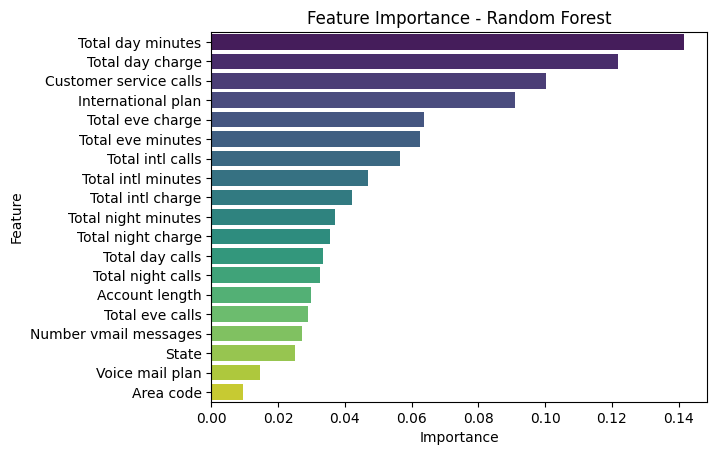

In [13]:
imp_feat= pd.DataFrame({"Feature": X.columns, "Importance": random.feature_importances_}).sort_values(by="Importance", ascending= False)
imp_feat


sns.barplot(x= "Importance", y= "Feature" , data= imp_feat, palette="viridis", hue= "Feature")
plt.title("Feature Importance - Random Forest")
plt.show()